In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:\jupyter notebook\Machine Learning\K- Means Clustering\Data set\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
x = df["Age"]
y = df["Income($)"]

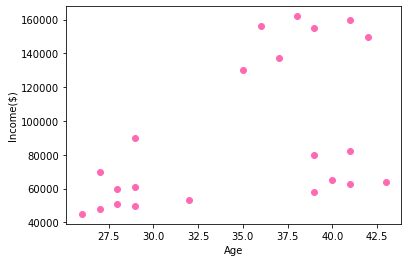

In [4]:
plt.scatter(x,y, color="hotpink")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

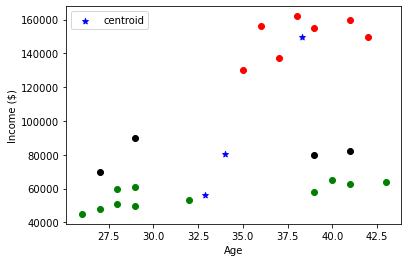

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

# Preprocessing using min max scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


# For Elbow Method

In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

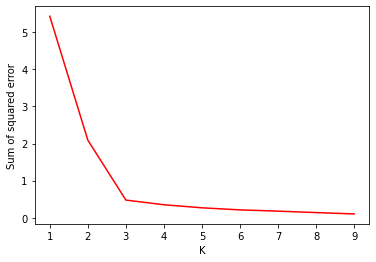

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse, color="red")
plt.show()

# As we can see K=3 for this problem

# For K Means Clustering

In [14]:
model = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([8, 3, 8, 8, 5, 2, 5, 2, 2, 4, 4, 1, 1, 1, 1, 7, 6, 6, 6, 0, 0, 6])

In [15]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,8
1,Michael,0.176471,0.384615,3
2,Mohan,0.176471,0.136752,8
3,Ismail,0.117647,0.128205,8
4,Kory,0.941176,0.897436,5


In [16]:
km.cluster_centers_

array([[0.82352941, 0.30769231],
       [0.08823529, 0.02884615],
       [0.68627451, 0.96296296],
       [0.17647059, 0.38461538],
       [0.58823529, 0.75641026],
       [0.91176471, 0.94017094],
       [0.86764706, 0.14957265],
       [0.35294118, 0.06837607],
       [0.11764706, 0.15954416]])

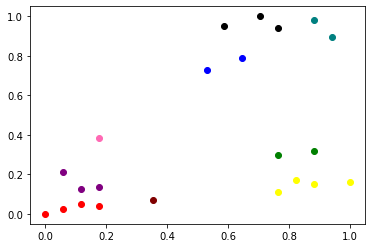

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]
df8 = df[df.cluster==7]
df9 = df[df.cluster==8]


plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(df4.Age,df4['Income($)'],color='hotpink')
plt.scatter(df5.Age,df5['Income($)'],color='blue')
plt.scatter(df6.Age,df6['Income($)'],color='teal')
plt.scatter(df7.Age,df7['Income($)'],color='yellow')
plt.scatter(df8.Age,df8['Income($)'],color='maroon')
plt.scatter(df9.Age,df9['Income($)'],color='purple')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#plt.legend()
plt.show()